## Machine Learning PART 1

## 0.scikit-learn datasets

- sklearn.datasets
- 빌트인 데이터 셋 : load_XXX()
    - 이미 설치된 데이터 셋
    - **load_boston() : 보스턴 지역 주택 가격, 회귀 용도**
    - **load_breast_cancer()** : 위스콘신 유방암 데이터, 악성/음성 레이블, 분류 용도
    - **load_diabetes() : 당뇨병 환자 데이터, 회귀 용도**
    - **load_digits()** : 손글씨 숫자(0~9) 데이터 셋, 분류 용도
    - **load_iris() : 붓꽃 품종 데이터, 분류 용도**
    - load_linnerud() : 피트니스 클럽 20명 중년 남성 생리학 변수, 회귀 용도
- ```from sklearn.datasets import load_iris```
- ```iris = load_iris()```
    


## 1.머신러닝 데이터셋 가져오기

In [15]:
!git clone https://github.com/Soyoung-Yoon/data_05

fatal: destination path 'data_05' already exists and is not an empty directory.


### 1-01. iris 데이터 가져오기

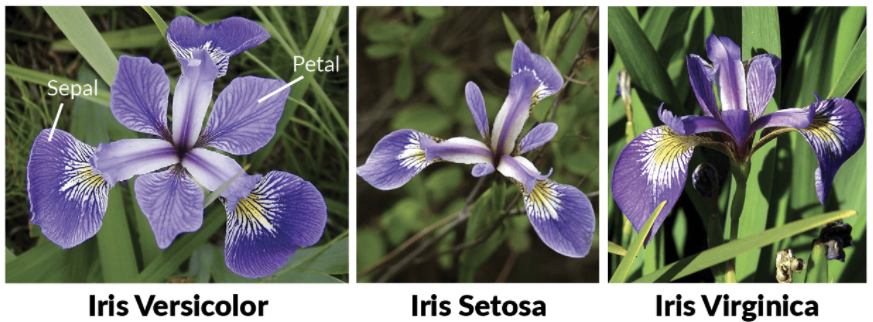


#### [1] iris 데이터셋 가져오기
- data_05 폴더에 있는 'iris.csv' 파일을 가져오기 하여 iris 라는 이름을 붙입니다.
- 내용을 확인하기 위해 첫 3개 행을 출력해봅니다.

In [16]:
import pandas as pd
import numpy as np
iris=pd.read_csv('data_05/iris.csv')
iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [17]:
names = np.array(['setosa', 'versicolor', 'virginica'])
iris['target'].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

#### [2] iris 데이터 셋을 보고 분석의 종류를 결정합니다.
- 회귀/분류

In [18]:
# target을 보고 결정할 수 있습니다.
# - target이 연속형 : 회귀 - 학습 데이터에 있는 target 내용 이외의 것이 예측값으로 나올 수 있음
# - target이 범주형 : 분류 - 학습 데이터에 있는 target 내용에 있는 것만 예측값으로 나올 수 있음

### 1-02. iris 데이터 탐색

#### [3] scatter matrix를 사용해 각 feature별로 범주별 관계를 살펴봅니다

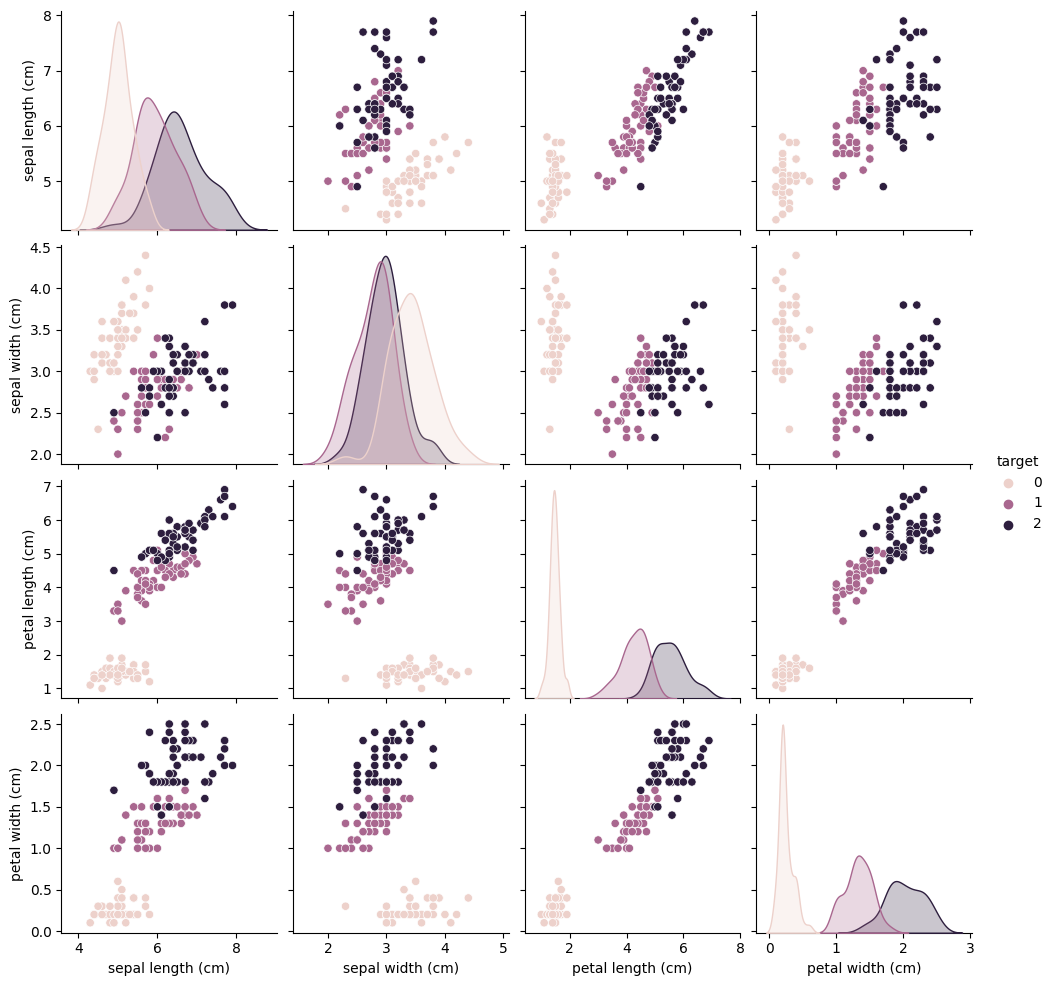

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris, hue='target')
plt.show()

#### [4] 범주별 평균의 차이가 있는지 살펴봅니다.
- 각 feature별 평균을 구해 보고, 통계적으로 유의미한지 살펴봅니다
- 변수가 1개이며, 범주가 3가지 이므로 oneway ANOVA를 사용합니다.

- 빅데이터 분석 기사 (합격률 50%)
- ADP (데이터 분석 전문가) (합격률 2%)
- ADsP (데이터 분석 준전문가) - 필기시험만

In [20]:
##### 범주형 - 범주형 두개의 변수는 독립일까? 관계가 있을까?
##### 카이제곱 검정
##### 귀무가설 : 두 변수의 관계는 독립이다
##### 대립가설 : 두 변수의 관계는 독립이 아니다
##### p <= 0.05 일때 두 변수는 독립이 아닌 관계가 있는 것
from scipy import stats

def statistical_test(mode, df, cat, target):
    uniques= df[cat].unique()    
    if mode == 't': #범주가 1개, 2개일 때 사용 - 범주 별 평균의 차이가 유의미한가?(성별에 따른 키 평균)
        group = df.groupby(cat)[target]
        samples = [group.get_group(i) for i in uniques]
        value, p = stats.ttest_ind(*samples)        
    elif mode == 'f':  #범주가 3개 이상일 때 사용 - 범주 별 평균의 차이가 유의미한가?(혈액형에 따른 키 평균)
        group = df.groupby(cat)[target]
        samples = [group.get_group(i) for i in uniques]
        value, p = stats.f_oneway(*samples)
    elif mode == 'c': # 두개 범주가 독립성을 갖는지 아닌지?(가사 노동의 종류와 구성원은 독립적? or 연관성?)
        contingency = pd.crosstab(index=df[cat], columns=df[target])
        value, p, df, expected = stats.chi2_contingency(contingency)
        
    return value, p, 'Statistically Signifcant' if p<=0.05 else 'Statistically Insignifcant'

In [21]:
# 통계적으로 평균의 차이가 있는지 검정
feature = 'sepal width (cm)'
statistical_test('f', iris, 'target', feature)

# 결과값: 범주 별 평균, p-value, 평균 차이 유무
# 가설 검정 - 가설을 세워 검정하는 것
# p-value 의미: 귀무 가설을 기각하고, 대립가설을 채택했을 때 틀릴 확률, 즉 p-value가 낮을수록 연관성 높음
# 귀무가설 - 집단 간 평균의 차이가 없다(=관계가 없다, 독립이다)
# 대립가설 - 집단 간 평균의 차이가 있다(=관계가 있다, 연관성 있다)



(49.160040089612075, 4.49201713330911e-17, 'Statistically Signifcant')

In [22]:
iris.corr()
#abs(0.3) 이상이면 선형 관계가 있다고 볼 수 있음
# 선형 모델을 사용해도 좋을 거 같음

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


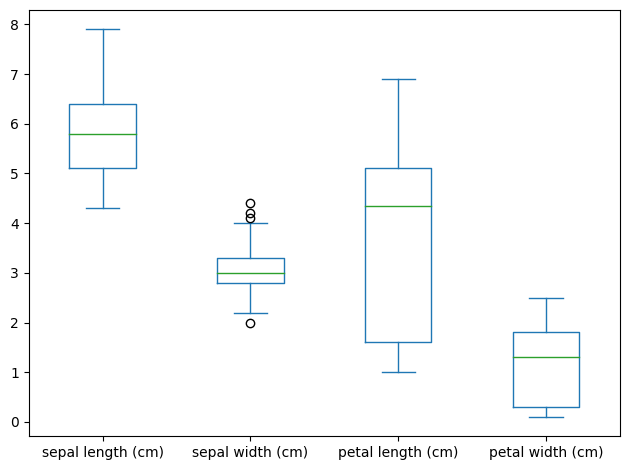

In [23]:
iris.iloc[:,:-1].plot(kind='box')
plt.tight_layout()
plt.show()

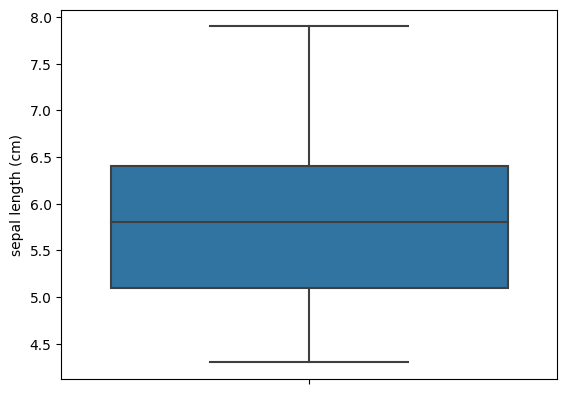

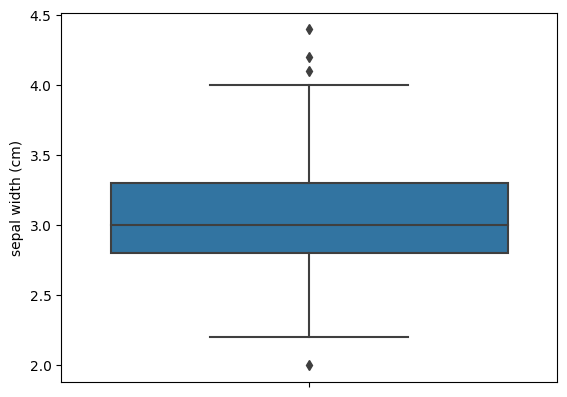

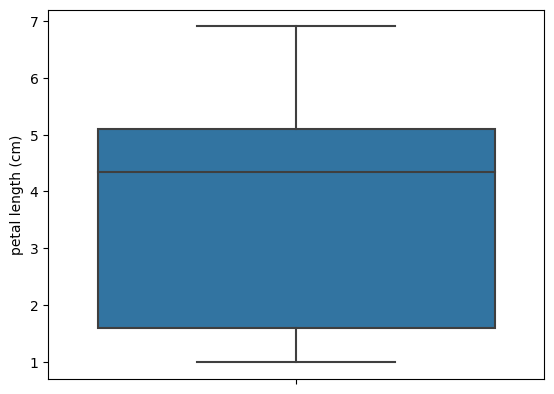

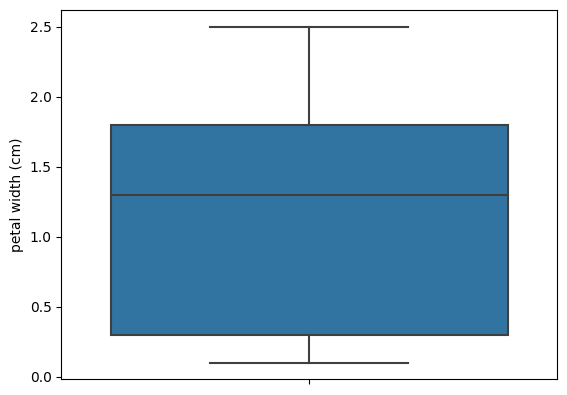

In [24]:
for f in iris.columns[:-1]:
    sns.boxplot(y=f, hue='target', data=iris)
    plt.show()

## 2.데이터 셋 분할 (Hold-Out)

### 2-01. 머신러닝의 Training vs Testing
- 머신러닝은 Training 단계와 Testing 단계로 구분됨
- Training 단계 : Training Data와 Learning Algorithm을 가지고 Model을 만듦
- Testing 단계 : Model에 Test Data를 적용하여 결과를 얻음


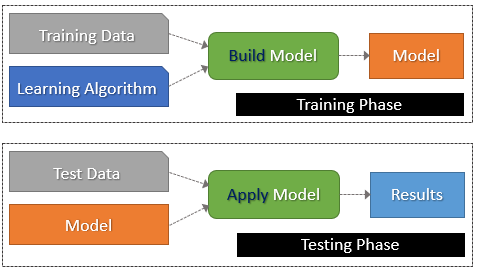

### 2-02. 머신러닝의 Datasets 종류
- Training Set (학습 세트) 
  - 알고리즘이 학습에 사용할 데이터
- Validation Set (검증 세트) 
  - 학습 세트를 사용해 모델을 학습하고 난 뒤,
  - 검증 세트를 사용해 모델의 예측/분류 정확도를 계산
  - 학습 도중에 얼마나 학습을 잘 진행했는지 검증을 위한 Set
  - Overfitting 을 줄이거나 Parameter 결정에 도움
- Test Set(평가 세트)
  - 모델이 예측/분류해준 값과 실제 값을 비교하여 '모델 성능 평가'
  - 알고리즘이 현실 세계에서 얼마나 잘 수행되는지 이해할 수 있게 됨


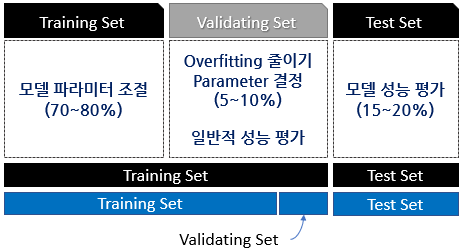

### 2-03. sklearn.model_selection

- X_train, X_test, y_train, y_test = train_test_split(sample, label, test_size, train_size, random_state, suffle, stratify)
   - 같은 크기의 Numpy 배열 2개를 지정된 비율로 나눠서 반환
   - test_size = 0.25 : 0.0~1.0 테스트 데이터셋 비율
   - train_size = None : 0.0~1.0 훈련 데이터셋 비율
   - random_state = None : 정수 값, 난수 발생의 시드(seed) 값
   - shuffle = True : boolean 값을 전달해서 섞을지 말지 결정
   - stratify : y의 지정한 데이터 비율을 유지(층화추출), y가 범주형일 때 사용함 
   - 예) 레이블 y가 0,1로 이루어진 binary이고, 비율이 25:75일 때, stratify=y이면 데이터셋도 0,1을 같은 비율로 유지함
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html   

#### [5] 데이터를 입력, 출력으로 분할
- 독립변수를 입력데이터, 종속변수를 출력데이터로 나눔
- DataFrame.iloc을 사용하여 iris 데이터를 X, y 분리

In [25]:
X = iris.iloc[:,:-1]  #iris.drop(columns='target')
y = iris['target']
print(X.shape, y.shape)  #X는 2차원, y는 1차원

(150, 4) (150,)


#### [6] X, y를 train, test 세트로 나누기
- X, y를 사용하여 train_size : test_size 를 0.8 : 0.2로 나누기
- random_state = 0 사용
- stratify = y 사용

In [26]:
iris2 = pd.concat([iris, iris.iloc[:100, :].copy()])
iris2['target'].value_counts()

0    100
1    100
2     50
Name: target, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
A = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0, stratify=y)
x_train, x_test, y_train, y_test = A
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [28]:
X2 = iris2.iloc[:, :-1]
y2 = iris2['target']
A = train_test_split(y2, test_size=0.2, random_state=0, stratify=y2)
y_train2, y_test2 = A
y_train2.value_counts()

1    80
0    80
2    40
Name: target, dtype: int64

In [29]:
y_train.value_counts()

0    40
1    40
2    40
Name: target, dtype: int64

In [30]:
y_test.value_counts()

# 각 target에 대해서 train size와 test size를 모두 동일 비율로 분배

0    10
1    10
2    10
Name: target, dtype: int64

## 3.kNN (k-Nearest Neighbors)
- 지도 학습
- 주어진 이웃의 개수(k) 만큼 가까운 멤버들과 비교하여 판단하는 방법
  - 새로운 데이터와 가까운 k개 이웃의 범주별 갯수를 비교
  - 거리 측정 알고리즘 : 유클리드, 맨하튼, Minkowski 거리 등
  - k 값에 따라 소속되는 그룹이 달라질 수 있음
- 데이터의 분포와 상관 없이 사용할 수 있음
- **스케일링이 중요함**
- 이상치의 영향을 받지 않음
- 학습에 시간이 소요되지 않음, 예측에 시간에 소요됨 - Lazy Learning
- k가 작을 경우 데이터의 지역적 특성을 지나치게 반영(Overfitting)
- k가 클 경우 과하게 일반화(Underfitting)

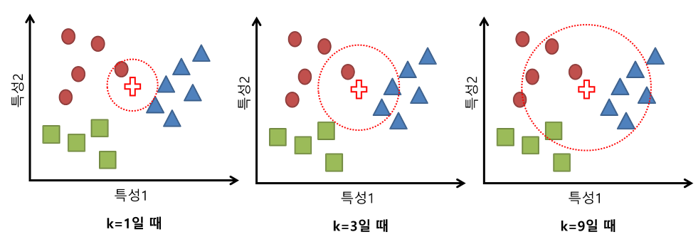

### 3-01. Distance Metric - 그림으로 이해
- 'Minkowski' : p=1 이면 'Manhattan' 거리, p=2 면 'Euclidean' 거리
- 암기법 : 1 Man, 2 E

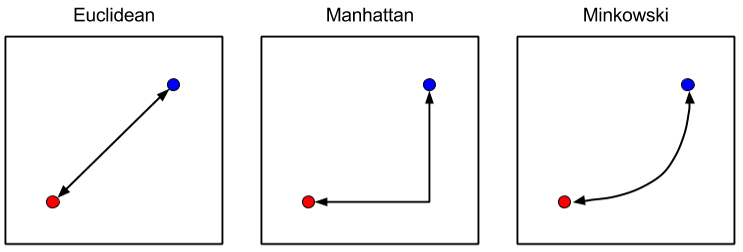
- 출처 : ```https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781785882104/6/ch06lvl1sec40/measuring-distance-or-similarity```

### 3-02. kNN 수행하기
- sklearn.neighbors.KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None)

   - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
   - 거리를 구하는 방법을 선택할 수 있음, 기본은 'minkowski', p=2 로 'euclidean' 거리, p=1 이면 'Manhattan' 거리
   - 짧은 거리의 노드를 찾는 알고리즘 선택 가능 : algorithm='kd_tree', 'ball_tree', 'brute', 'auto' (default)
   - knn = KNeighborsClassifier(K)
   - knn.fit() : Fit the model using X as training data and y as target values
   - knn.predict() : Predict the class labels for the provided data
   
- kNN의 회귀 모델 : KNeighborsRegressor

#### [7] kNN 모델 생성하기
- k를 3으로 지정하여 모델 생성 및 학습

In [31]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(3)

#### [8] 모델의 학습 데이터 및 평가 데이터 성능 평가

In [32]:
model.fit(x_train, y_train)
print('학습 데이터 성능 :',  model.score(x_train,y_train))
print('평가 데이터 성능 :',  model.score(x_test,y_test))

학습 데이터 성능 : 0.95
평가 데이터 성능 : 1.0


#### [9] 모델을 사용한 값의 예측

In [33]:
print('실제 값 :',  y_test.to_numpy())
print('예측 값 :',  model.predict(x_test))

실제 값 : [0 1 0 2 0 1 2 0 0 1 2 1 1 2 1 2 2 1 1 0 0 2 2 2 0 1 1 2 0 0]
예측 값 : [0 1 0 2 0 1 2 0 0 1 2 1 1 2 1 2 2 1 1 0 0 2 2 2 0 1 1 2 0 0]


#### [10] 분류 모델의 범주별 예측 확률 계산
- predict_proba 함수를 사용함

In [38]:
import pandas as pd
proba = model.predict_proba(x_test)
pd.DataFrame(proba, columns=['0일 확률', '1일 확률', '2일 확률']).head(5)

,0일 확률,1일 확률,2일 확률
0,1.0,0.000000,0.000000
1,0.0,1.000000,0.000000
2,1.0,0.000000,0.000000
3,0.0,0.333333,0.666667
4,1.0,0.000000,0.000000


## 4.좋은 k 찾기 - 반복문 사용 (iris 데이터)
- 일반적으로 3 ~ 10 사이에서 주로 많이 결정하거나, 학습 데이터의 개수에 제곱근으로 설정
- 최적의 분류 성능을 내는 k 값을 테스트해서 얻어내는 방법이 최선
   - 반복문을 이용하여 테스트
   - hyper parameter를 찾아주는 Tunner 이용 : GridSearch

#### [11] n_neighbors를 1 ~ 10 까지 지정
- KNN 모델을 만들어 x_train, y_train으로 학습시킴
- train 데이터, test 데이터를 사용했을 때의 정확도를 
- model.score(입력, 출력)를 사용하여 구해 train_score, test_score에 저장

In [53]:
k_range = range(1, 11)
train_score = []
test_score = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
    train_score.append(model.score(x_train,y_train))  #append 같은 경우 계속 추가하는 것이기 때문에 초기화하는 코드를 같은 Cell 안에 넣어둠
    test_score.append(model.score(x_test,y_test))


#### [12] train_score, test_score 확인

In [57]:
print(train_score)
print(test_score)

[1.0, 0.975, 0.95, 0.95, 0.9583333333333334, 0.9666666666666667, 0.9583333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
[0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


#### [13] train_score, test_score 시각화
- x축을 n_neighbors의 범위(k_range)
- y축을 정확도(train_score, test_score)로 하는 선 그래프를 그린다 (2개의 그래프) 
- plt.plot() 사용
- 선그래프에 범례로 사용될 label은 'Train Accuracy', 'Test Accuracy'로 지정함, plt.plot()에 함께 지정
- plt.xticks()를 k_range로 지정함
- 제목을 'Find Best K-Value in iris' 로 지정한다   plt.title() 사용
- legend, grid를 표시함

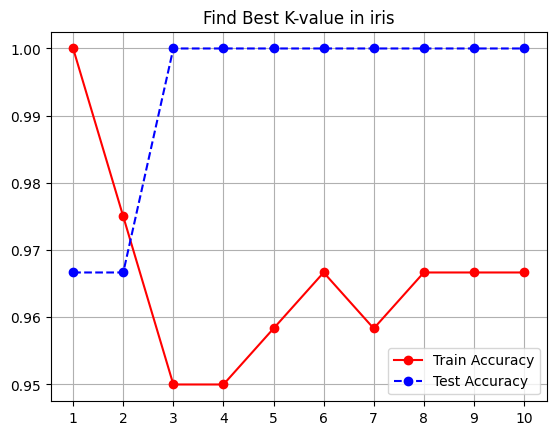

In [55]:
import matplotlib.pyplot as plt

plt.plot(k_range, train_score, 'ro-', label='Train Accuracy')
plt.plot(k_range, test_score, 'bo--', label='Test Accuracy')
plt.xticks(k_range)
plt.title('Find Best K-value in iris')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
# 그래프에서 최적의 K는 ( 2 )이다
# train_score가 test_score보다 엄청 좋을 경우 과대적합이 발생한 것으로 추정

## 5.스케일링 (Scaling)
- 값의 스케일이 다른 두 개의 변수가 있을 때, 이 변수들의 스케일 차이를 제거해 주는 것

### 5-01. 스케일링의 필요성
- 데이터 모델링 전에 '스케일링' 과정이 필요함 
- '스케일링'을 통해 다차원의 값들을 비교 분석하기 쉽게 만듦
- 자료의 오버플로우(overflow), 언더플로우(underflow) 방지
    - 학습 도중 여러가지 연산을 하는데 dtype마다 표현 가능한 수치 범위가 있는데 그것을 초과하면 overflow
- 특히 거리 기반 알고리즘에서 '스케일링'은 매우 중요함 
    - 예) kNN, k-means 
- 스케일러 사용 전에 이상치(Outlier)에 대한 조치(제거 or 값 변환) 필요: 이상치가 스케일링 결과에 영향을 주기 때문임

### 5-02. MinMaxScaler
- 정규화(Nomalization) : 서로 다른 규모의 특징 값을 같은 규모(단위)로 통일시키기 위해 사용하는 방법
- MinMaxScaler : 모든 특징 값을 0 ~1 사이로 변환 
- sklearn.preprocessing.MinMaxScaler(feature_range)
   - feature_range = (0, 1)
   - 정규화 목표 구간 : tuple => (min, max)
   - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [58]:
# np를 사용하여 데이터 생성
import numpy as np
arr = np.array([2, 8, 10], dtype=np.float32)
arr

array([ 2.,  8., 10.], dtype=float32)

In [ ]:
# 식에 의한 정규화 : min,max 스케일링(MinMaxScaler 함수 내부 식)
(arr - arr.min()) / (arr.max() - arr.min())

array([0.  , 0.75, 1.  ], dtype=float32)

In [59]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler에 의한 스케일링(transform 사용)
mm_scaler = MinMaxScaler()
mm_scaler.fit(arr.reshape(-1,1))
scaled = mm_scaler.transform(arr.reshape(-1,1))
scaled

array([[0.  ],
       [0.75],
       [1.  ]], dtype=float32)

In [60]:
# 위와 동일한 결과(fit_transform 사용)
mm_scaler = MinMaxScaler()
scaled = mm_scaler.fit_transform(arr.reshape(-1,1))
scaled

array([[0.  ],
       [0.75],
       [1.  ]], dtype=float32)

- 모델링에 사용된 Data Set(Train Set)과 모델링 결과를 이용해 실제 Data 예측을 위해 Data Set이 같은 상태여야 함
- 즉, 컬럼의 개수, 컬럼의 순서, 단위, 분포도 동일해야함
- 그래서 전처리 방법(Scaler, 엔코더, 주성분 분석, ...., log, sqrt, boxcox)을 알아야 실제 Input Data Set도 동일하게 처리해야함

### 5-03. iris 스케일링 - MinMaxScaler

#### [14] MinMaxScaler를 사용하여 x_train, x_test 스케일링 
- x_train : fit_transform (Fit도 하고 Transform도 같이 하는 것)
- x_test : transform (Transform만 해야함)

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

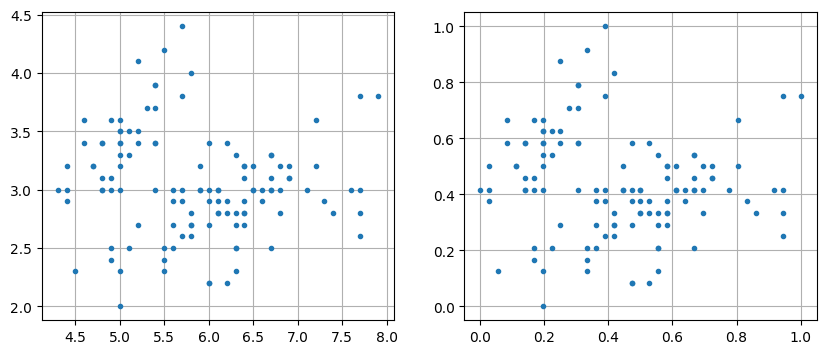

In [105]:
# 그래프를 사용해 분포를 확인합니다
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(x_train.iloc[:, 0], x_train.iloc[:, 1], '.')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(x_train_sc[:, 0], x_train_sc[:, 1], '.')
plt.grid(True)
plt.show()

#### [15] 스케일링 된 X를 사용한 모델링
- feature 값의 범위에 큰 차이가 없으므로 스케일링 된 X를 사용해도 결과에는 큰 차이는 없음
- 스케일링을 x_train, x_test 따로 하거나, 한꺼번에 하는 방법 모두 사용할 수 있음

In [115]:
X = iris.iloc[:, :-1]  # iris.drop(columns='target')
y = iris['target']
A = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
x_train, x_test, y_train, y_test = A
print(x_train.shape, x_test.shape,  y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [116]:
# x_train, x_test 따로 스케일링
# Data Split 먼저 하고 이후에 Scaling

from sklearn.preprocessing import MinMaxScaler
# train_test_split()은 위에서 미리 했음
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)  # 현재까지의 수집된 데이터 사용하므로 fit_transform 사용
x_test_sc = scaler.transform(x_test)  # 미래의 모르는 상태의 데이터로 간주하므로 transform 사용

model=KNeighborsClassifier(3)
model.fit(x_train_sc,y_train)
model.score(x_train_sc, y_train), model.score(x_test_sc, y_test)

(0.9583333333333334, 0.9666666666666667)

In [120]:
# X 스케일링(한꺼번에)
# Scaling 먼저 하고 이후에 data split

scaler =MinMaxScaler()
X_scaled=scaler.fit_transform(X)

A = x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y) 
#test_split 안에 X_scaled가 들어오도록 확인(복붙하면서 실수 많음)
x_train, x_test, y_train, y_test = A

mmodel=KNeighborsClassifier(3)
model.fit(x_train,y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9666666666666667, 0.9666666666666667)

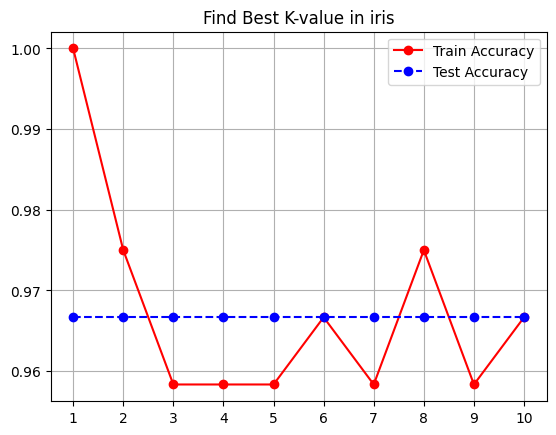

In [118]:
# 가장 좋은 K값 찾기(여기서는 6이 제일 좋아보임)

k_range = range(1, 11)
train_sc_score = []
test_score = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
    train_sc_score.append(model.score(x_train,y_train))  #append 같은 경우 계속 추가하는 것이기 때문에 초기화하는 코드를 같은 Cell 안에 넣어둠
    test_score.append(model.score(x_test,y_test))



import matplotlib.pyplot as plt

plt.plot(k_range, train_sc_score, 'ro-', label='Train Accuracy')
plt.plot(k_range, test_score, 'bo--', label='Test Accuracy')
plt.xticks(k_range)
plt.title('Find Best K-value in iris')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### 5-04. StandardScaler 
- **표준화(Standardization)** : 표준 정규 분포가 되도록 스케일링함
- 표준 정규 분포(Standard Normal Distribution) : 평균이 0 이고 표준편차가 1인 가우시안 분포
- sklearn.preprocessing.StandardScaler
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- StandardScaler.fit() : Compute the mean and std to be used for later scaling
- StandardScaler.transform() : Perform standardization by centering and scaling
- StandardScaler.fit_transform() : Fit to data, then transform it

### 5-05. iris 스케일링 - StandardScaler

In [83]:
# np를 사용하여 데이터 생성
import numpy as np
arr = np.array([2, 8, 10], dtype=np.float32)
arr

array([ 2.,  8., 10.], dtype=float32)

In [84]:
# arr의 평균, 표준편차 구하기
arr.mean(), arr.std()

(6.6666665, 3.3993464)

In [85]:
# 식에 의한 표준화 : arr에서 arr의 평균을 뺀것을 arr의 표준편차로 나누어서 하게 됨 (StandardScaler 함수 내부 식)
brr = (arr - arr.mean()) / arr.std()
brr

array([-1.3728129 ,  0.39223233,  0.98058075], dtype=float32)

In [86]:
# brr의 평균, 표준편차 구하기
brr.mean(), brr.std()

(5.9604645e-08, 1.0)

#### [16] StandardScaler를 사용하여 x_train, x_test 스케일링 
- X_train : fit_transform
- X_test : transform

In [165]:
X = iris.iloc[:, :-1]  # iris.drop(columns='target')
y = iris['target']
A = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
x_train, x_test, y_train, y_test = A
print(x_train.shape, x_test.shape,  y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

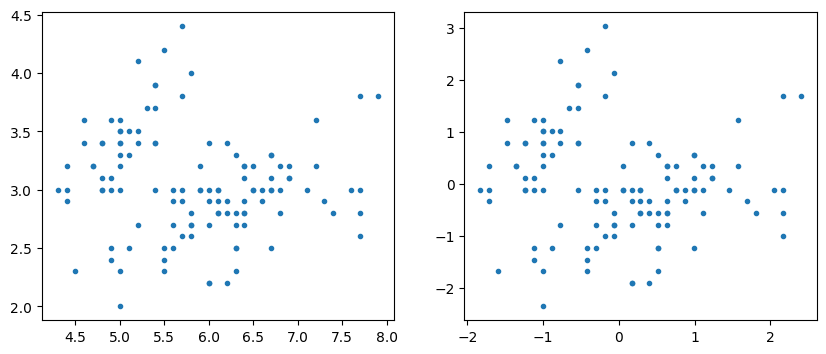

In [167]:
# 그래프를 사용해 분포를 확인합니다
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(x_train.iloc[:, 0], x_train.iloc[:, 1], '.')
plt.subplot(1, 2, 2)
plt.plot(x_train_sc[:, 0], x_train_sc[:, 1], '.')
plt.show()

#### [17] 스케일링 된 X를 사용한 모델링
- feature 값의 범위에 큰 차이가 없으므로 스케일링 된 X를 사용해도 결과에는 큰 차이는 없음
- 스케일링을 x_train, x_test 따로 하거나, 한꺼번에 하는 방법 모두 사용할 수 있음

In [157]:
# x_train, x_test 따로 스케일링

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

model=KNeighborsClassifier(2)
model.fit(x_train_sc,y_train)
model.score(x_train_sc, y_train), model.score(x_test_sc, y_test)

(0.9666666666666667, 0.9333333333333333)

In [168]:
# X 스케일링(한꺼번에)

scaler =StandardScaler()
X_scaled=scaler.fit_transform(X)
A = x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y) 
#test_split 안에 X_scaled가 들어오도록 확인(복붙하면서 실수 많음)
x_train, x_test, y_train, y_test = A

mmodel=KNeighborsClassifier(3)
model.fit(x_train,y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.95, 1.0)

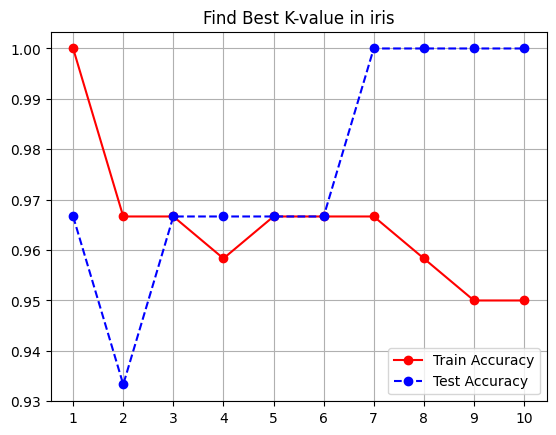

In [169]:
# 가장 좋은 K값 찾기(여기서는 3,5,6이 제일 좋아보임, train과 test가 같으면 Best)

k_range = range(1, 11)
train_sc_score = []
test_score = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
    train_sc_score.append(model.score(x_train,y_train))  #append 같은 경우 계속 추가하는 것이기 때문에 초기화하는 코드를 같은 Cell 안에 넣어둠
    test_score.append(model.score(x_test,y_test))

import matplotlib.pyplot as plt

plt.plot(k_range, train_sc_score, 'ro-', label='Train Accuracy')
plt.plot(k_range, test_score, 'bo--', label='Test Accuracy')
plt.xticks(k_range)
plt.title('Find Best K-value in iris')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## 6.Self Study - KNN
Q 다음의 데이터 세트에 K-NN 모델을 적용하세요.
- 학습 데이터 70%, 평가 데이터 30%로 분할하세요.
- 최적의 K 값을 찾아주세요.

In [ ]:
from sklearn.datasets import load_breast_cancer

# cancer라는 이름에 암 데이터셋을 가져오기 합니다.
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['class'] = cancer.target
df.to_csv('breast_cancer.csv', index=False)

In [ ]:
print(cancer['DESCR'])

In [ ]:
# cancer의 target_names를 확인합니다.
# malignamt : 악성, benign : 양성
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# data_05/breast_cancer.csv 파일 읽어 cancer로 저장하기
cancer = 


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# cancer에 대한 정답(class)을 확인합니다.


1    357
0    212
Name: class, dtype: int64

In [ ]:
# StandardScaler 스케일링


# 데이터 train, test분할

# 데이터 분할 시 stratify=y를 사용해 봅니다.



result = []
# 모델 평가(최적의 K값 테스트)


result = np.array(result)
result

array([[1.        , 0.9122807 ],
       [0.96483516, 0.86842105],
       [0.96263736, 0.90350877],
       [0.95824176, 0.90350877],
       [0.94725275, 0.9122807 ],
       [0.94505495, 0.9122807 ],
       [0.94505495, 0.9122807 ],
       [0.94945055, 0.9122807 ],
       [0.94505495, 0.90350877]])

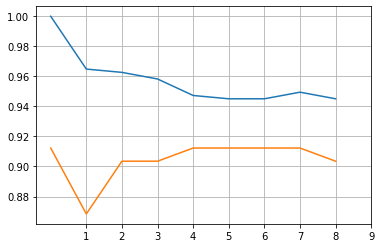

In [ ]:
# 그래프로 확인하기



plt.show()